In [4]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\Admin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Admin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Read the input file and check the data dimension

In [5]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [6]:
gc_df = pd.read_csv("german_credit.csv")
gc_df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [7]:
print (gc_df.columns)

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')


In [8]:
print (gc_df.shape)

(1000, 21)


In [9]:
# printing the values of dependent variable "default" 

print (gc_df.default.unique())

[0 1]


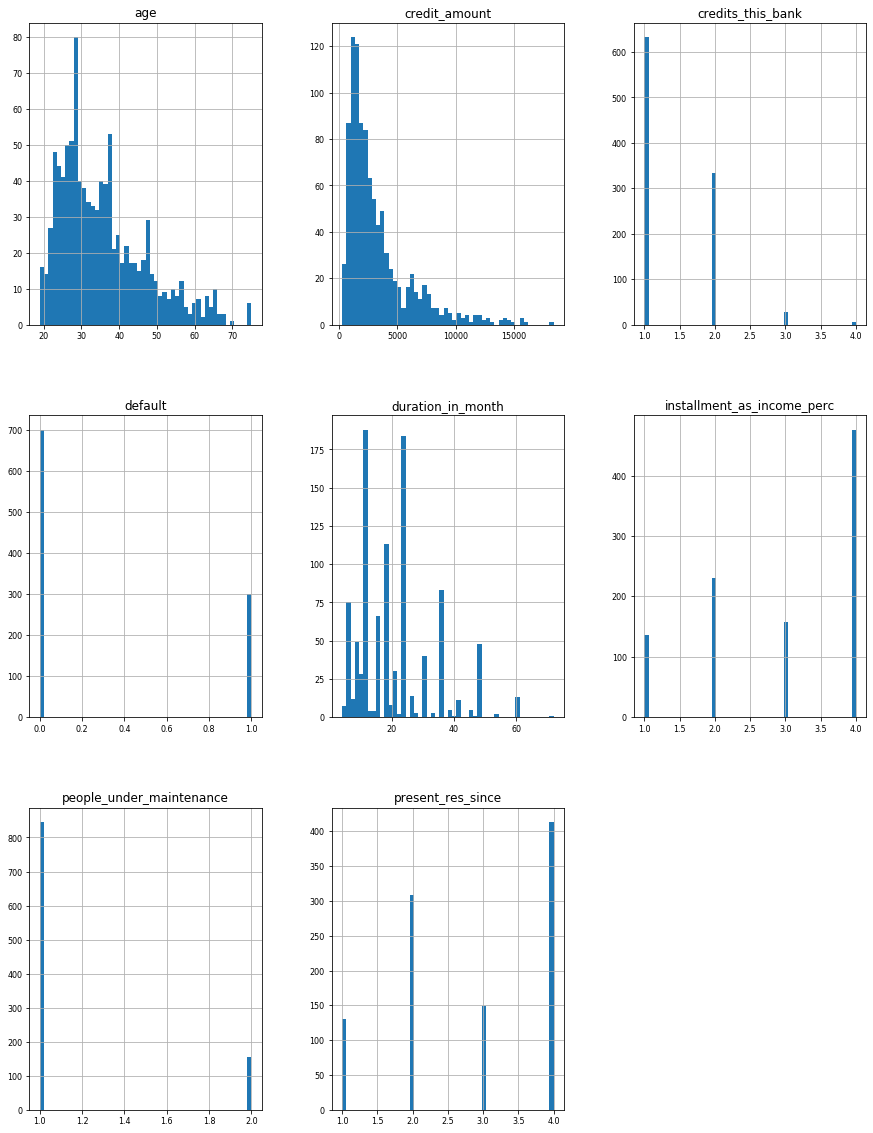

In [10]:
# Distribution for each variable

gc_df.hist(figsize=(15,20),bins = 50,xlabelsize=8,ylabelsize =8)
plt.show()

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [11]:
X = gc_df.drop('default',axis=1)
Y = gc_df['default']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.50)
print (X_train.shape)
print (x_test.shape)

print (Y_train.shape)
print (y_test.shape)

(500, 20)
(500, 20)
(500,)
(500,)


In [14]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [15]:
X_train_dummy = pd.get_dummies(X_train)

X_train_dummy.shape

(500, 61)

In [16]:
x_test_dummy = pd.get_dummies(x_test)

x_test_dummy.shape

(500, 61)

In [17]:
# Print Shape of model data

### Check for highly correlated variables but don't required any treatment for this use case

In [18]:
X_train_dummy.corr()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
duration_in_month,1.000000,0.652559,0.094322,0.021668,-0.016594,0.002387,-0.005429,0.141400,0.064591,-0.069515,...,-0.051174,-0.100239,0.161401,0.061568,-0.044175,-0.176762,-0.144565,0.144565,-0.146604,0.146604
credit_amount,0.652559,1.000000,-0.205048,-0.019770,0.043432,-0.030449,0.037540,0.181199,-0.003860,-0.110509,...,-0.103892,-0.054342,0.318294,-0.059803,-0.009205,-0.172704,-0.267119,0.267119,-0.085678,0.085678
installment_as_income_perc,0.094322,-0.205048,1.000000,0.050272,0.037262,0.077091,-0.079694,-0.035890,0.007783,-0.022077,...,0.033026,-0.081389,0.070641,0.037612,-0.131214,-0.041510,-0.004241,0.004241,-0.031945,0.031945
present_res_since,0.021668,-0.019770,0.050272,1.000000,0.238969,0.085860,0.031491,-0.060842,0.074860,-0.035264,...,-0.279776,0.171130,-0.023407,-0.002085,0.020585,0.011619,-0.051132,0.051132,-0.059358,0.059358
age,-0.016594,0.043432,0.037262,0.238969,1.000000,0.167481,0.094472,-0.091604,-0.030027,0.034493,...,0.016333,-0.207534,0.115947,-0.155021,0.087942,0.051754,-0.136136,0.136136,0.001763,-0.001763
credits_this_bank,0.002387,-0.030449,0.077091,0.085860,0.167481,1.000000,0.098408,-0.080699,-0.013928,-0.008668,...,0.067443,-0.123027,-0.029308,0.000749,0.096526,-0.019802,-0.028699,0.028699,-0.038719,0.038719
people_under_maintenance,-0.005429,0.037540,-0.079694,0.031491,0.094472,0.098408,1.000000,-0.083940,0.107876,0.009661,...,-0.022843,-0.053986,0.004183,-0.127731,-0.015064,0.150876,0.012196,-0.012196,0.078696,-0.078696
account_check_status_0 <= ... < 200 DM,0.141400,0.181199,-0.035890,-0.060842,-0.091604,-0.080699,-0.083940,1.000000,-0.354932,-0.173533,...,0.008558,-0.025333,0.068366,-0.070041,0.085811,-0.008799,-0.006162,0.006162,-0.063685,0.063685
account_check_status_< 0 DM,0.064591,-0.003860,0.007783,0.074860,-0.030027,-0.013928,0.107876,-0.354932,1.000000,-0.168230,...,-0.109881,0.093083,-0.019179,-0.045680,-0.008901,0.071436,0.055650,-0.055650,0.041673,-0.041673
account_check_status_>= 200 DM / salary assignments for at least 1 year,-0.069515,-0.110509,-0.022077,-0.035264,0.034493,-0.008668,0.009661,-0.173533,-0.168230,1.000000,...,0.000333,-0.022098,-0.059456,0.024704,0.029484,0.004663,0.001912,-0.001912,0.029484,-0.029484


credit_month and duration_in_month are well correlated

### Drop the original variables which are converted to dummy

In [19]:
print (X_train_dummy.columns)

Index(['duration_in_month', 'credit_amount', 'installment_as_income_perc',
       'present_res_since', 'age', 'credits_this_bank',
       'people_under_maintenance', 'account_check_status_0 <= ... < 200 DM',
       'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_(vacation - does not exist?)', 'purpose_business',
       'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs', 'purpose_r

# Inference

original columns are already deleted by get_dummies

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [20]:
gc_df_dummy = pd.get_dummies(gc_df)

In [21]:
A = gc_df_dummy.drop('default',axis=1)
B = gc_df_dummy['default']

In [22]:
X_training, x_testing, Y_training, y_testing = train_test_split(A, B, test_size=0.30)
print (X_training.shape)
print (x_testing.shape)

print (Y_training.shape)
print (y_testing.shape)

(700, 61)
(300, 61)
(700,)
(300,)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [23]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=2, criterion="entropy", random_state=9999)
rnd_clf.fit(X_training, Y_training)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [24]:
from sklearn.metrics import accuracy_score
y_pred_rf = rnd_clf.predict(x_testing)
accuracy_score(y_testing, y_pred_rf)

0.7533333333333333

In [25]:
print(metrics.confusion_matrix(y_testing, y_pred_rf))

[[195  11]
 [ 63  31]]


### Q6 Show the list of the features importance( 1 Marks)

In [26]:
print (pd.DataFrame(rnd_clf.feature_importances_, columns = ["Importanf Features"], index = X_training.columns))

                                                    Importanf Features
duration_in_month                                             0.078942
credit_amount                                                 0.091941
installment_as_income_perc                                    0.032553
present_res_since                                             0.031774
age                                                           0.080287
credits_this_bank                                             0.017427
people_under_maintenance                                      0.011016
account_check_status_0 <= ... < 200 DM                        0.016315
account_check_status_< 0 DM                                   0.031845
account_check_status_>= 200 DM / salary assignm...            0.007798
account_check_status_no checking account                      0.051138
credit_history_all credits at this bank paid ba...            0.010178
credit_history_critical account/ other credits ...            0.023163
credit

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [27]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [28]:
# Use below values
num_folds = 10
seed = 77

In [29]:
kfold = model_selection.KFold(n_splits=num_folds, random_state=seed)

In [30]:
kfold

KFold(n_splits=10, random_state=77, shuffle=False)

# Validate random forest model above with the kfold

In [31]:
model = RandomForestClassifier(n_estimators=500, n_jobs=2, criterion="entropy", random_state=9999)

In [32]:
cv_results = model_selection.cross_val_score(model, X_training, Y_training, cv=kfold)

In [33]:
cv_results

array([0.77142857, 0.7       , 0.75714286, 0.78571429, 0.81428571,
       0.77142857, 0.71428571, 0.81428571, 0.68571429, 0.81428571])

# Calculate Mean score

In [34]:
cv_results.mean()

0.7628571428571428

In [35]:
# Calculate score standard deviation using std()

In [36]:
cv_results.std()

0.045714285714285714

# Q8 Print the confusion matrix( 1 Marks)

In [37]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [38]:
y_pred = model_selection.cross_val_predict(model, X_training, Y_training, cv=kfold)
conf_mat = confusion_matrix(Y_training, y_pred)

In [39]:
print (conf_mat)

[[463  31]
 [135  71]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [40]:
print(metrics.classification_report(Y_training, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       494
           1       0.70      0.34      0.46       206

    accuracy                           0.76       700
   macro avg       0.74      0.64      0.65       700
weighted avg       0.75      0.76      0.73       700



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [41]:
#Hint: Use roc_curve

In [42]:
from sklearn import metrics

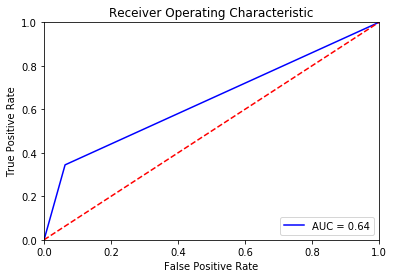

In [43]:
fpr, tpr, threshold = metrics.roc_curve(Y_training, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
